In [27]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_train.csv')
predict_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_test.csv')



In [31]:
train_data.keys()

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

In [33]:
#CATEGORICAL COLUMNS
cat_cols=['Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC']

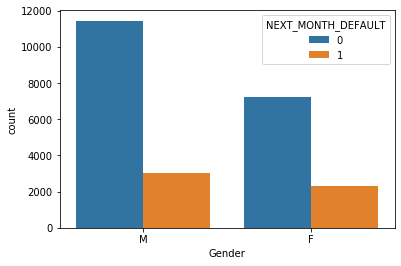

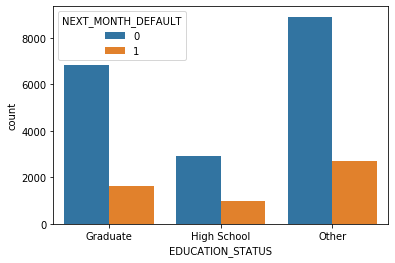

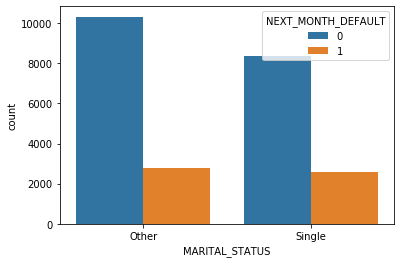

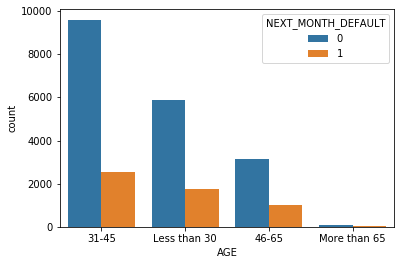

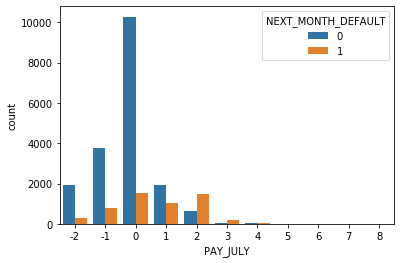

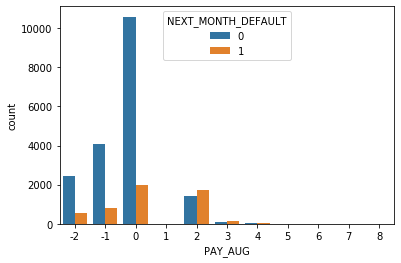

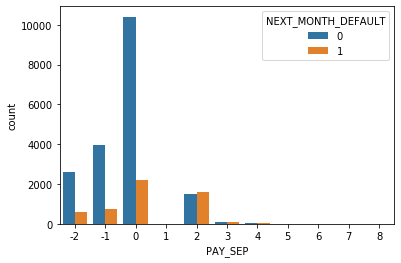

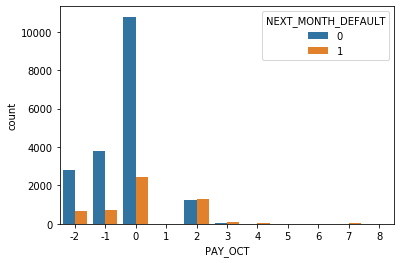

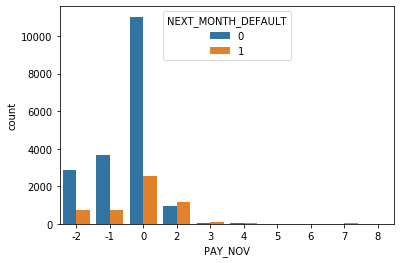

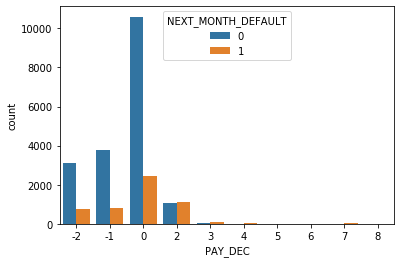

In [36]:
target = 'NEXT_MONTH_DEFAULT'
for col in cat_cols:
    plt.figure()
    sns.countplot(x = col,data=train_data,hue=target)
    plt.savefig('E:/ML_IP/ML_projects/datastorm/git_repo/data_analysis/%s.jpg'%col)
    

In [10]:
train_data['PAY_JULY_GREAT2']=train_data['PAY_JULY']>1.5 #APPLY ONE-HOT
train_data['PAY_AUG_GREAT1']=train_data['PAY_AUG']>1 #APPLY ONE-HOT
train_data['PAY_SEP_GREAT1']=train_data['PAY_SEP']>1 #APPLY ONE-HOT
train_data['PAY_OCT_GREAT1']=train_data['PAY_OCT']>1 #APPLY ONE-HOT
train_data['PAY_NOV_GREAT1']=train_data['PAY_NOV']>1 #APPLY ONE-HOT
train_data['PAY_DEC_GREAT1']=train_data['PAY_DEC']>1 #APPLY ONE-HOT
train_data['TOT']=train_data['PAY_JULY']+train_data['PAY_AUG']+train_data['PAY_SEP']+train_data['PAY_OCT']+train_data['PAY_NOV']+train_data['PAY_DEC']


predict_data['PAY_JULY_GREAT2']=predict_data['PAY_JULY']>1.5 #APPLY ONE-HOT
predict_data['PAY_AUG_GREAT1']=predict_data['PAY_AUG']>1 #APPLY ONE-HOT
predict_data['PAY_SEP_GREAT1']=predict_data['PAY_SEP']>1 #APPLY ONE-HOT
predict_data['PAY_OCT_GREAT1']=predict_data['PAY_OCT']>1 #APPLY ONE-HOT
predict_data['PAY_NOV_GREAT1']=predict_data['PAY_NOV']>1 #APPLY ONE-HOT
predict_data['PAY_DEC_GREAT1']=predict_data['PAY_DEC']>1 #APPLY ONE-HOT
predict_data['TOT']=predict_data['PAY_JULY']+predict_data['PAY_AUG']+predict_data['PAY_SEP']+predict_data['PAY_OCT']+predict_data['PAY_NOV']+predict_data['PAY_DEC']


In [11]:

cat_cols=['Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY_GREAT2',
       'PAY_AUG_GREAT1', 'PAY_SEP_GREAT1', 'PAY_OCT_GREAT1', 'PAY_NOV_GREAT1',
       'PAY_DEC_GREAT1']
train_data = pd.get_dummies( train_data,columns = cat_cols )
predict_data = pd.get_dummies( predict_data,columns = cat_cols )

[0.02448662 0.01285839 0.0106787  0.0104184  0.01223426 0.01436081
 0.06023454 0.05185108 0.05052479 0.04967099 0.04899154 0.05008532
 0.04780055 0.04649613 0.0466832  0.0453198  0.04837574 0.05315783
 0.02504823 0.00857857 0.00861696 0.00966672 0.00918903 0.01058137
 0.00947981 0.00957332 0.01172151 0.00956168 0.0110575  0.00149706
 0.04677069 0.04776733 0.0199865  0.02378008 0.00882548 0.0080041
 0.00631266 0.00784002 0.00373693 0.00764875 0.00632202 0.00420504]


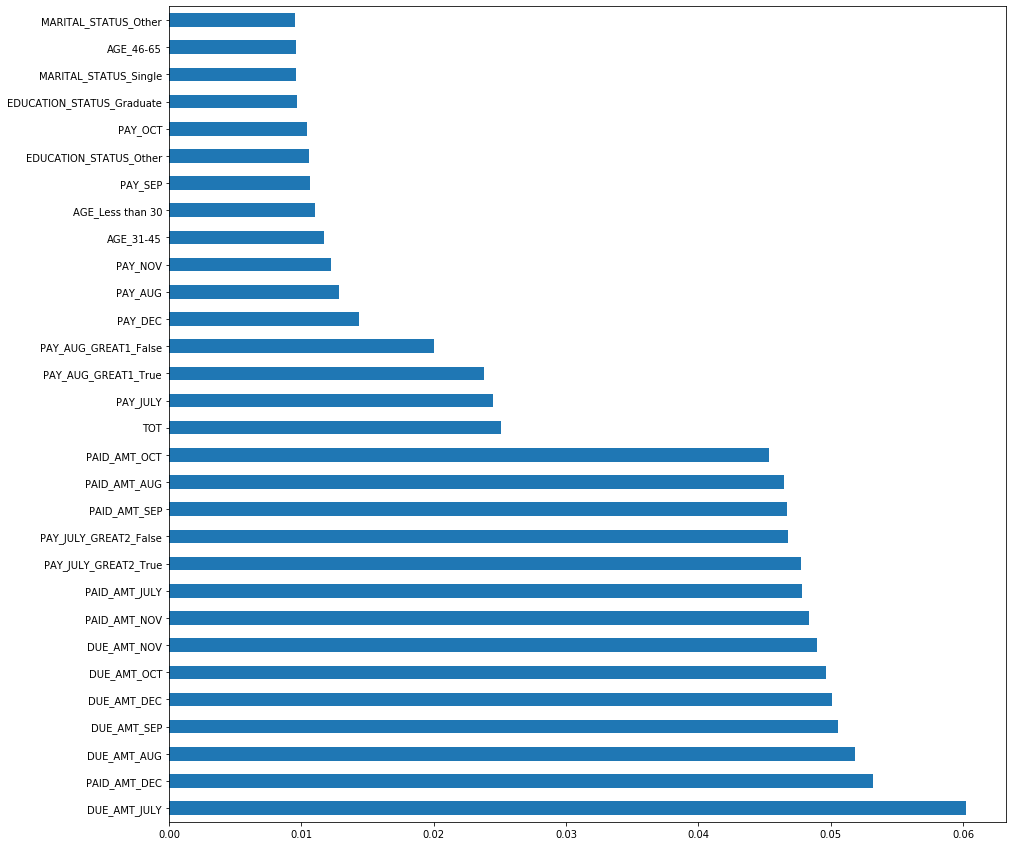

In [12]:
X = train_data.drop(['NEXT_MONTH_DEFAULT','Client_ID','Balance_Limit_V1'],axis=1)  #independent columns
y = train_data['NEXT_MONTH_DEFAULT']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
plt.figure(figsize=(15,15))
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [13]:
t1=train_data.drop(['Client_ID', 'Balance_Limit_V1', 'PAY_AUG', 'PAY_SEP',
       'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 
         'Gender_F',
       'Gender_M', 'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'PAY_SEP_GREAT1_False',
       'PAY_SEP_GREAT1_True', 'PAY_OCT_GREAT1_False', 'PAY_OCT_GREAT1_True',
       'PAY_NOV_GREAT1_False', 'PAY_NOV_GREAT1_True', 'PAY_DEC_GREAT1_False',
       'PAY_DEC_GREAT1_True'],axis=1)


t2=predict_data.drop(['Client_ID', 'Balance_Limit_V1', 'PAY_AUG', 'PAY_SEP',
       'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 
         'Gender_F',
       'Gender_M', 'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'PAY_SEP_GREAT1_False',
       'PAY_SEP_GREAT1_True', 'PAY_OCT_GREAT1_False', 'PAY_OCT_GREAT1_True',
       'PAY_NOV_GREAT1_False', 'PAY_NOV_GREAT1_True', 'PAY_DEC_GREAT1_False',
       'PAY_DEC_GREAT1_True'],axis=1)

In [15]:
X_train_ud, X, y_train_ud, y = train_test_split(t1.drop('NEXT_MONTH_DEFAULT',axis=1),t1['NEXT_MONTH_DEFAULT'],test_size = 0.3,shuffle=True)
X_val_ud, X_test_ud, y_val_ud, y_test_ud = train_test_split(X,y,test_size = 0.5,shuffle=False) 

X_predict_ud=t2

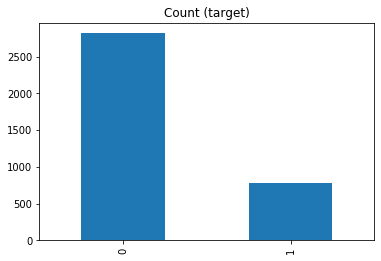

In [16]:
y_test_ud.value_counts().plot(kind='bar', title='Count (target)')


In [17]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
#X_train_ud,y_train_ud=ros.fit_resample(X_train_ud,y_train_ud)
#X_val_ud,y_val_ud=ros.fit_resample(X_val_ud,y_val_ud)
#X_test_ud,y_test_ud=ros.fit_resample(X_test_ud,y_test_ud)

Using TensorFlow backend.


In [21]:
std_scale = MinMaxScaler().fit(X_train_ud)
X_train_ud = pd.DataFrame(std_scale.transform(X_train_ud))
X_test_ud  = pd.DataFrame(std_scale.transform(X_test_ud))
X_val_ud  = pd.DataFrame(std_scale.transform(X_val_ud))
X_predict_ud  = pd.DataFrame(std_scale.transform(X_predict_ud))
#X_predict  = pd.DataFrame(std_scale.transform(predict_data))

In [22]:
X_train_ud.shape,X_predict_ud.shape

((16800, 18), (6000, 18))

[0.02295443 0.07487497 0.06448933 0.06313724 0.06092663 0.05990328
 0.06140774 0.05942646 0.05910025 0.05894885 0.05755521 0.05916349
 0.06539062 0.05882536 0.06597995 0.05427147 0.02869009 0.02495463]


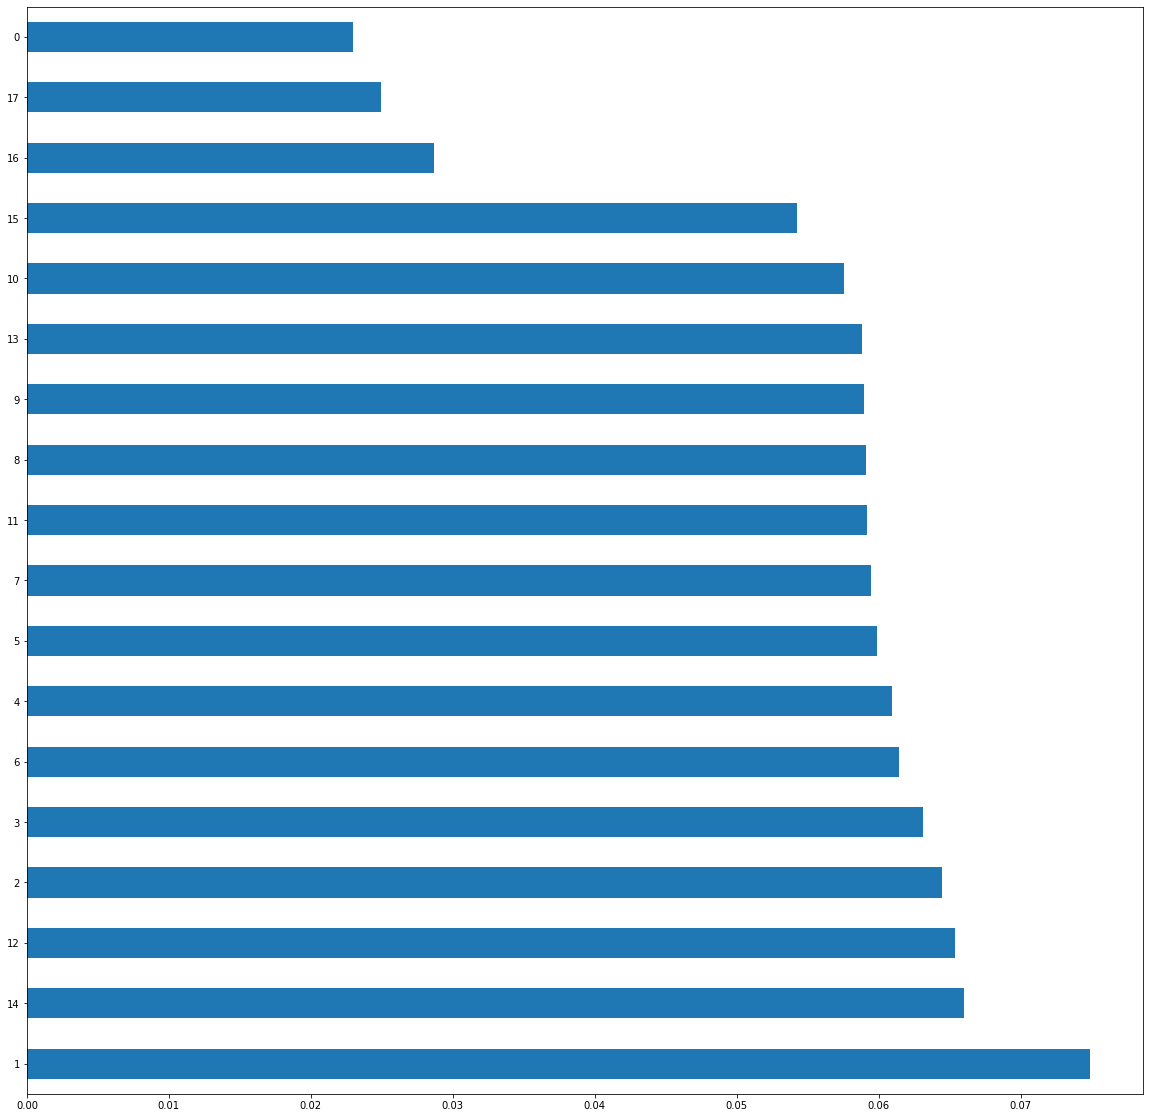

In [25]:
X = X_train_ud  #independent columns
y = y_train_ud    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(20,20))
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()